# Tea Drink Visualization

<img src="https://images.unsplash.com/photo-1559056427-6fe5ce77f06d?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80" alt="Tea drinking" width="600" />

There are plenty of tea drink products in Indonesia. They are as common as bottled water or coffee these days. Tea drinks can be found on small stores, supermarkets, malls, restaurants, street vendors, and practically everywhere.

Despite its popularity, data analysis about this product is quite rare. Probably due to lack of ready-to-use data. I've found reliable source from Indonesian Food And Drug Administration (Bahasa: BPOM-Badan Pengawas Obat dan Makanan).

Link: http://cekbpom.pom.go.id/index.php/home/produk/r2isesetrjp2lvbjcb4617o7i0/13/row/5100/page/0/order/4/DESC/search/1/minuman%20teh

The data is extracted from html table, converted to CSV, and then cleansed to make it usable for analysis.

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
import os
import re

This dataset is in Bahasa Indonesia. For short translation, these are what each column represents:
- **nomor_registrasi** : ID of registered product in BPOM database. In this dataset, this ID uniqueness has been validated.
- **nama_product** : product name, basically explaining what product this is. For this dataset, this provides detailed information about the tea drink.
- **merk** : brand of the product.
- **jenis_kemasan** : type of package.
- **ukuran_kemasan** : size(s) of package for every registered product. Please do note that one product may have more than one package size. They are encapsulated in round brackets (a.k.a '()') and separated by semicolon (a.k.a ';').
- **produsen** : name of manufacturing company
- **kota_produsen** : city where manufacturing company HQ (and probably its plant) is located
- **provinsi_produsen** : province where manufacturing company HQ (and probably its plant) is located

In [2]:
dataset = pd.read_csv("dataset_bpom_tea.csv")
dataset.head(10)

,nomor_registrasi,nama_produk,merk,jenis_kemasan,ukuran_kemasan,produsen,kota_produsen,provinsi_produsen
0,MD 268313029029,Minuman Teh,Glitz,Gelas Plastik,(240ml),PT SUMBER TIRTA PAMENANG,Kota Kediri,Jawa Timur
1,MD 268313014046,Minuman Teh Melati (Original Tea),TEH GELAS,Gelas Plastik,(270ml; 300ml),PT CS2 POLA SEHAT,Kab. Tangerang,Banten
2,ML 568309009270,Minuman Teh Hijau Aroma Melati,Yeos,Kaleng,(300ml),PT YHS INDONESIA,Kota Jakarta Pusat,DKI Jakarta
3,MD 268310010072,Minuman Teh Aroma Melati,Zegar,Gelas Plastik,(165ml; 185ml; 220ml; 270ml; 300ml),PT TANG MAS,Kota Depok,Jawa Barat
4,MD 268310004208,Minuman Teh Putih Rasa Leci,Fiesta,Botol Plastik,(450ml),PT HOKKAN INDONESIA,Kab. Bogor,Jawa Barat
5,MD 268311010253,Minuman Teh Putih Rasa Jeruk Yuzu,,Botol Plastik,(350ml; 450ml; 485ml; 500ml),PT SAVORIA KREASI RASA,Kab. Kudus,Jawa Tengah
6,MD 268328002092,Minuman Teh Hijau Dengan Madu,ICHI OCHA,Botol Plastik,(350ml; 450ml; 500ml),PT ANUGERAH INDOFOOD BAROKAH MAKMUR,Kota Jakarta Selatan,DKI Jakarta
7,MD 268320009024,Minuman Teh Melati (Original Tea),TEH GELAS,Gelas Plastik,(270ml; 300ml),PT CS2 POLA SEHAT,Kab. Tangerang,Banten
8,MD 268310012045,Minuman Teh Hijau Rasa Leci (Lychee Green Tea ...,Futami 17,Botol Plastik,(350ml; 485ml),PT FUTAMI FOOD & BEVERAGES,Kota Jakarta Utara,DKI Jakarta
9,MD 268310011045,Minuman Teh Hijau Rasa Persik (Peach Green Tea...,Futami 17,Botol Plastik,(350ml; 485ml),PT FUTAMI FOOD & BEVERAGES,Kota Jakarta Utara,DKI Jakarta


In [3]:
dataset.dtypes

nomor_registrasi     object
nama_produk          object
merk                 object
jenis_kemasan        object
ukuran_kemasan       object
produsen             object
kota_produsen        object
provinsi_produsen    object
dtype: object

## Distribution of Tea Drink Packages

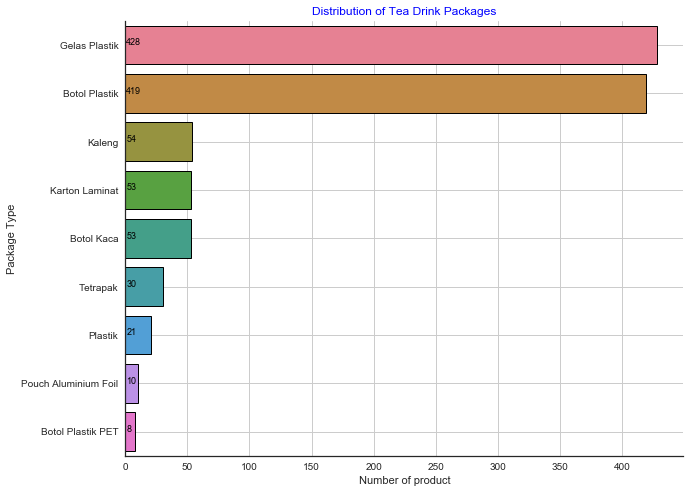

In [182]:
dataset_kemasan = dataset["jenis_kemasan"].value_counts().reset_index()
dataset_kemasan = dataset_kemasan[dataset_kemasan["jenis_kemasan"]>=2]
plt.figure(figsize=(10,8))
ax = sns.barplot(y=dataset_kemasan["index"][:15],x = dataset_kemasan["jenis_kemasan"][:15],palette="husl",
                 linewidth=1,edgecolor="k"*15)
sns.set_style("white")
sns.despine()
plt.xlabel("Number of product")
plt.ylabel("Package Type")
plt.grid(True)
plt.title("Distribution of Tea Drink Packages",color='b')

for i,j in enumerate(dataset_kemasan["jenis_kemasan"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 9,color="black")
plt.show()

Most of tea drinks are packaged in plastic bottle ("Botol Plastik") or plastic cup ("Gelas Plastik"). Some other packages available are aluminum can, laminated carton, glass bottle, tetrapak, Aluminum foil pouch, and PET plastic bottle. Some products are packaged in plastic ("Plastik"), which is unclear whether it is bottle or cup. It is probably caused by non-standard data entry process.

From this graph, one can conclude that tea drinks largely contributes to plastic production. According to [this source](https://www.wartaekonomi.co.id/read193618/berebut-manisnya-industri-minuman-teh-dalam-kemasan.html), the industry produces roughly 2 billion liters of tea drink annually. Assuming average tea serving size is 350ml, the industry sends **5.7 billion cups/bottles** to the environment annually.

## Distribution of Tea Servings

Tea serving data can be obtained from "ukuran_kemasan" column. Please note that the column contains many values. So, we will need an array to capture all of those values, and then put them into DataFrame.

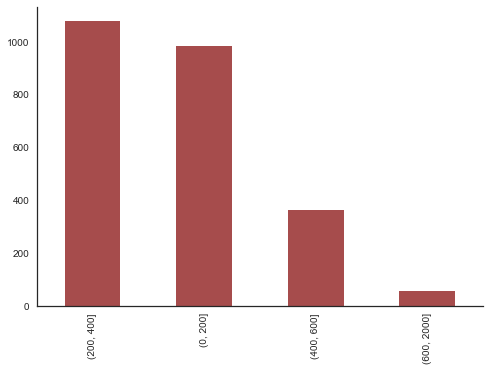

In [188]:
#get all serving sizes using regex search over iterated rows
a=[]
for index,item in dataset["ukuran_kemasan"].iteritems():
    for s in re.findall(r'[0-9]+', item):
        a.append(int(s))
#create new Pandas series and group them by 4 serving size groups
index = ['Small', 'Medium', 'Large']
dataset_servings = pd.DataFrame({'value': a})

bins = pd.IntervalIndex.from_tuples([(0, 200), (200,400), (400, 600), (600, 2000)])
dataset_servings = pd.cut(dataset_servings['value'], bins).value_counts()

ax = dataset_servings.plot.bar(color="maroon", alpha=0.7)
sns.set_style("white")
sns.despine()
plt.show()

Manufacturers choose to make their serving size not too big. Majority of tea drinks are served in either small bottles (200ml - 400ml) or in cups (up to 200ml). Regular bottle (400ml - 600ml) products exist, although it is not really popular among manufacturers. Some large quantities serving products also exist in market, but it is significantly less than other products.

This finding can be explained from both manufacturer and user perspective. From user perspective, it indicates that Indonesian people preferred compact-sized tea drinks. Probably it is due to easier mobility, and the serving size is just enough to satisfy the thirst. From manufacturer perspective, it is always profitable to sell small servings because it costs less, but sells for more margin. For example, if 500ml tea sells for Rp5.000,00 then 250ml tea always sells for more than Rp2.500,00. Small bottle servings might be an equilibrium zone for tea drinks.

## Distribution of Flavours

Tea drink has many combination of flavours. It could be either jasmine tea, black tea, white tea, oolong tea, etc. It can be added with honey or milk as well. Some even have fruity flavours like apple, orange, or blackcurrant. Some tea has flavour combination like honey jasmine tea or fruit black tea. To deal with that requirement technically, new columns are created. These columns will display binary characteristic of tea flavours.

In [179]:
dataset_flavour = dataset
dataset_flavour["is_jasmine"] = [1 if ('Melati' in x or 'Jasmine' in x) else 0 for x in dataset_flavour['nama_produk']]
dataset_flavour["is_black"] = [1 if ('Hitam' in x or 'Black ' in x) else 0 for x in dataset_flavour['nama_produk']]
dataset_flavour["is_green"] = [1 if ('Hijau' in x or 'Green ' in x) else 0 for x in dataset_flavour['nama_produk']]
dataset_flavour["is_white"] = [1 if ('Putih' in x or 'White ' in x) else 0 for x in dataset_flavour['nama_produk']]
dataset_flavour["is_honey"] = [1 if ('Madu' in x or 'Honey ' in x) else 0 for x in dataset_flavour['nama_produk']]
dataset_flavour["is_milk"] = [1 if ('Susu' in x or 'Milk ' in x) else 0 for x in dataset_flavour['nama_produk']]
dataset_flavour["is_flavoured"] = [1 if ('Rasa' in x) else 0 for x in dataset_flavour['nama_produk']]
dataset_flavour["is_oolong"] = [1 if ('Oolong' in x) else 0 for x in dataset_flavour['nama_produk']]
dataset_flavour.head()

,nomor_registrasi,nama_produk,merk,jenis_kemasan,ukuran_kemasan,produsen,kota_produsen,provinsi_produsen,is_jasmine,is_black,is_green,is_white,is_honey,is_milk,is_flavoured,is_oolong,is_local
0,MD 268313029029,Minuman Teh,Glitz,Gelas Plastik,(240ml),PT SUMBER TIRTA PAMENANG,Kota Kediri,Jawa Timur,0,0,0,0,0,0,0,0,1
1,MD 268313014046,Minuman Teh Melati (Original Tea),TEH GELAS,Gelas Plastik,(270ml; 300ml),PT CS2 POLA SEHAT,Kab. Tangerang,Banten,1,0,0,0,0,0,0,0,1
2,ML 568309009270,Minuman Teh Hijau Aroma Melati,Yeos,Kaleng,(300ml),PT YHS INDONESIA,Kota Jakarta Pusat,DKI Jakarta,1,0,1,0,0,0,0,0,0
3,MD 268310010072,Minuman Teh Aroma Melati,Zegar,Gelas Plastik,(165ml; 185ml; 220ml; 270ml; 300ml),PT TANG MAS,Kota Depok,Jawa Barat,1,0,0,0,0,0,0,0,1
4,MD 268310004208,Minuman Teh Putih Rasa Leci,Fiesta,Botol Plastik,(450ml),PT HOKKAN INDONESIA,Kab. Bogor,Jawa Barat,0,0,0,1,0,0,1,0,1


Now that necessary columns are ready, we can proceed to visualization step.

We will use pie chart to show percentage of tea flavour.

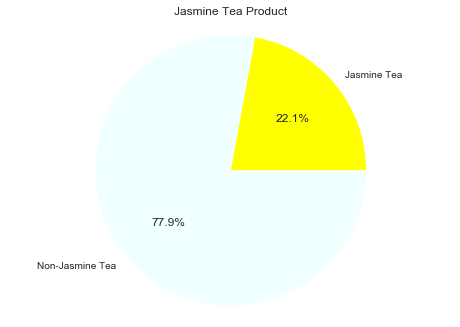

In [7]:
# Jasmine pie chart
labels = ['Jasmine Tea', 'Non-Jasmine Tea']
sizes = [dataset_flavour[dataset_flavour["is_jasmine"]==1].count()["is_jasmine"],dataset_flavour[dataset_flavour["is_jasmine"]==0].count()["is_jasmine"]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['yellow', 'azure'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Jasmine Tea Product')

plt.show()

Jasmine tea is popular tea type in Indonesia. The ingredients are primarily tea leaves and jasmine flowers. It is characterized by its pleasant odor.

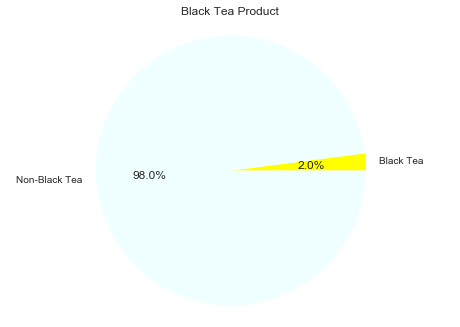

In [8]:
# Black Tea pie chart
labels = ['Black Tea', 'Non-Black Tea']
sizes = [dataset_flavour[dataset_flavour["is_black"]==1].count()["is_black"],dataset_flavour[dataset_flavour["is_black"]==0].count()["is_black"]]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['yellow', 'azure'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Black Tea Product')

plt.show()

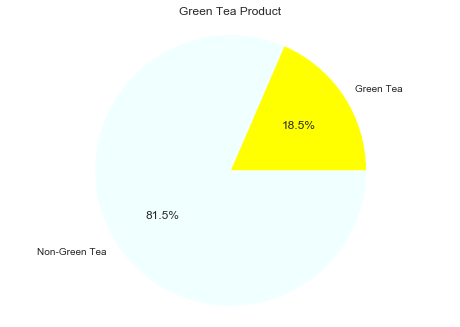

In [9]:
# Green Tea pie chart
labels = ['Green Tea', 'Non-Green Tea']
sizes = [dataset_flavour[dataset_flavour["is_green"]==1].count()["is_green"],dataset_flavour[dataset_flavour["is_green"]==0].count()["is_green"]]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['yellow', 'azure'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Green Tea Product')

plt.show()

Green tea is also quite popular. While most of tea drinks in this case is sweet, green tea gives acceptable bitter taste for the population.

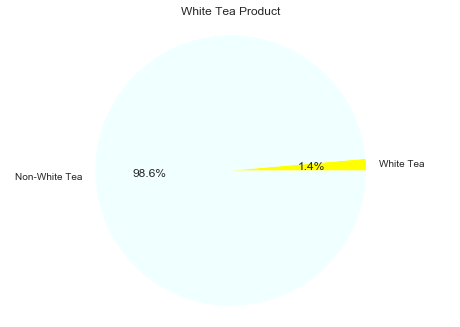

In [10]:
# White Tea pie chart
labels = ['White Tea', 'Non-White Tea']
sizes = [dataset_flavour[dataset_flavour["is_white"]==1].count()["is_white"],dataset_flavour[dataset_flavour["is_white"]==0].count()["is_white"]]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['yellow', 'azure'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('White Tea Product')

plt.show()

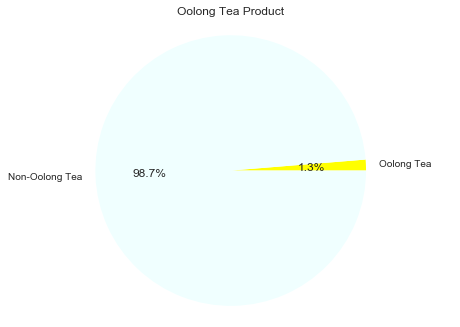

In [11]:
# Oolong Tea pie chart
labels = ['Oolong Tea', 'Non-Oolong Tea']
sizes = [dataset_flavour[dataset_flavour["is_oolong"]==1].count()["is_oolong"],dataset_flavour[dataset_flavour["is_oolong"]==0].count()["is_oolong"]]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['yellow', 'azure'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Oolong Tea Product')

plt.show()

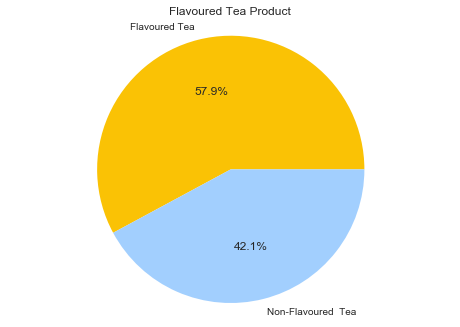

In [12]:
# Flavoured Tea pie chart
labels = ['Flavoured Tea', 'Non-Flavoured  Tea']
sizes = [dataset_flavour[dataset_flavour["is_flavoured"]==1].count()["is_flavoured"],dataset_flavour[dataset_flavour["is_flavoured"]==0].count()["is_flavoured"]]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['xkcd:goldenrod', 'xkcd:baby blue'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Flavoured Tea Product')

plt.show()

This graph shows interesting insight. **More than half** of tea drinks in Indonesia are flavoured. Different sensation might be expected from tea drink, whether it is fruity , honey, or milk flavour.

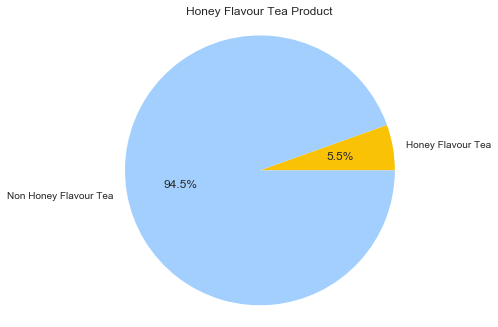

In [13]:
# Honeyed Tea pie chart
labels = ['Honey Flavour Tea', 'Non Honey Flavour Tea']
sizes = [dataset_flavour[dataset_flavour["is_honey"]==1].count()["is_honey"],dataset_flavour[dataset_flavour["is_honey"]==0].count()["is_honey"]]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['xkcd:goldenrod', 'xkcd:baby blue'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Honey Flavour Tea Product')

plt.show()

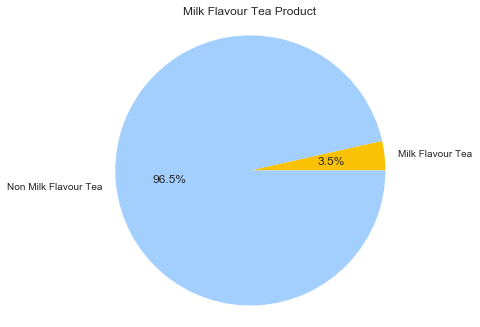

In [14]:
# Milk Tea pie chart
labels = ['Milk Flavour Tea', 'Non Milk Flavour Tea']
sizes = [dataset_flavour[dataset_flavour["is_milk"]==1].count()["is_milk"],dataset_flavour[dataset_flavour["is_milk"]==0].count()["is_milk"]]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['xkcd:goldenrod', 'xkcd:baby blue'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Milk Flavour Tea Product')

plt.show()

## Import vs Local Brands

The difference from local and import brands can be identified by its registration number. For this case, only two permits matter.
First, **MD registered product** indicates that the local producer has its own brand.
Then, **ML registered product** indicates that the producer import goods and then sell it in Indonesia. In short, a product with this label means this is importing brand.

"nomor_registrasi" column contains information whether a product is registered as domestic product (MD) or imported product (ML). Upon checking the value, those two are only options exist in dataset. So, we can create binary column "is_local" by matching substring in each row of "nomor_registrasi". If it matches with "MD", then "is_local" value equals 1. Otherwise, the value is 0.

In [178]:
dataset_brand = dataset
dataset_brand["is_local"] = [1 if ('MD' in x ) else 0 for x in dataset_brand['nomor_registrasi']]

Then, we can make new pie chart from "is_local" column.

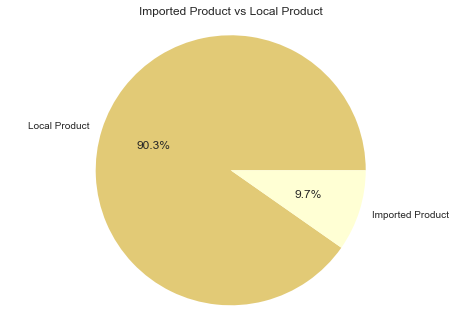

In [172]:
# Imported and Local Product
labels = ['Local Product', 'Imported Product']
sizes = [dataset_flavour[dataset_flavour["is_local"]==1].count()["is_local"],dataset_flavour[dataset_flavour["is_local"]==0].count()["is_local"]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['xkcd:sand', 'xkcd:eggshell'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Imported Product vs Local Product')

plt.show()

Almost ten percent of registered tea drinks in Indonesia are imported. It *doesn't* mean imported tea drinks own 10% market share in indonesia. It means that while foreign brand can exist in Indonesia, local brands still hold their presence to customers.

## Manufacturer Location

Tea drink manufacturers are distributed in 49 cities.


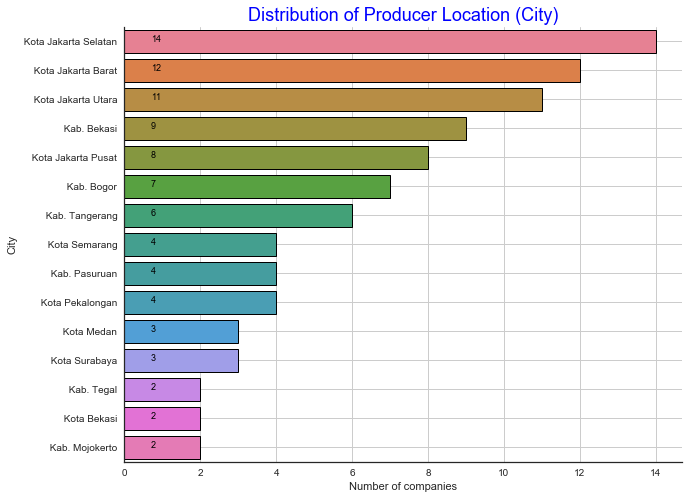

In [175]:
# Select manufacturer and its location
dataset_loc = dataset[["kota_produsen","produsen"]].drop_duplicates().reset_index()
loc_count = dataset_loc["kota_produsen"].value_counts().reset_index()
print("Tea drink manufacturers are distributed in %d cities." % dataset_loc["kota_produsen"].unique().size)
# Create graph
plt.figure(figsize=(10,8))
ax = sns.barplot(y=loc_count["index"][:15],x = loc_count["kota_produsen"][:15],palette="husl",
                 linewidth=1,edgecolor="k"*15)
sns.set_style("white")
sns.despine()
plt.xlabel("Number of companies")
plt.ylabel("City")
plt.grid(True)
plt.title("Distribution of Producer Location (City)",color='b',fontsize = 18)

for i,j in enumerate(loc_count["kota_produsen"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 9,color="black")
plt.show()

Tea drink manufacturers are distributed in 15 provinces.


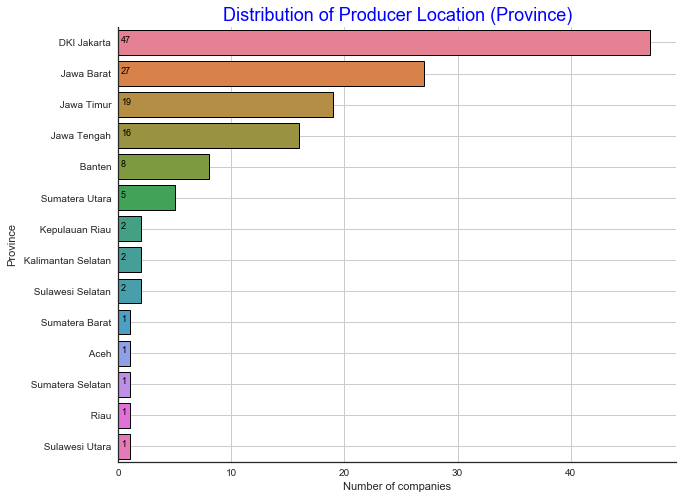

In [181]:
# Select manufacturer and its location
dataset_loc = dataset[["provinsi_produsen","produsen"]].drop_duplicates().reset_index()
loc_count = dataset_loc["provinsi_produsen"].value_counts().reset_index()
print("Tea drink manufacturers are distributed in %d provinces." % dataset_loc["provinsi_produsen"].unique().size)
# Create graph
plt.figure(figsize=(10,8))
ax = sns.barplot(y=loc_count["index"][:15],x = loc_count["provinsi_produsen"][:15],palette="husl",
                 linewidth=1,edgecolor="k"*15)
sns.set_style("white")
sns.despine()
plt.xlabel("Number of companies")
plt.ylabel("Province")
plt.grid(True)
plt.title("Distribution of Producer Location (Province)",color='b',fontsize = 18)

for i,j in enumerate(loc_count["provinsi_produsen"][:15].astype(str)):
    ax.text(.2,i,j,fontsize = 9,color="black")
plt.show()

According to this dataset, tea drink manufacturers spread in **49 cities** and **15 provinces**. Majority of them are located in Java Island. There are some reasons behind this fact:
- more than 70% of Indonesian population are located in Java
- Infrastructures in Java are more developed, thus making it cheaper to distribute the products


## List of Companies

In [36]:
dataset_corp = dataset["produsen"].unique()
print("Number of companies:",dataset_corp.size)
dataset_corp

Number of companies: 134


array(['PT SUMBER TIRTA PAMENANG', 'PT CS2 POLA SEHAT', 'PT YHS INDONESIA',
       'PT TANG MAS ', 'PT HOKKAN INDONESIA', 'PT SAVORIA KREASI RASA',
       'PT ANUGERAH INDOFOOD BAROKAH MAKMUR', 'PT FUTAMI FOOD & BEVERAGES',
       'UD. INTERFOOD', 'PT SINAR SOSRO', 'CV MAJU SARI TEH',
       'PT INDOMARU LESTARI', 'PT HON CHUAN INDONESIA',
       'PT TIRTA ALAM SEGAR', 'PT NUTRIFOOD INDONESIA',
       'PT TRITEGUH MANUNGGALSEJATI', 'OKEYREN',
       'PT ABC President Indonesia', 'PT COCA-COLA BOTTLING INDONESIA',
       'PT KENCANA ABADI JAYA', 'MAKUTARAMA', 'PT TRISUMBER MAKMUR INDAH',
       'PT MESKOM AGRO SARIMAS', 'PT FORISA NUSAPERSADA',
       'PT INTERFOOD SUKSES JASINDO', 'PT POKKA DIMA INTERNATIONAL',
       'PT HEALTH TODAY INDONESIA', 'CV KARYA KENCANA PUTRA',
       'PT STARFOOD JAYA PRIMA', 'PT HALAL BERKAH INDONESIA',
       'PT TIRTA FRESINDO JAYA', 'CV PANEN LESTARI',
       'PT ULTRAJAYA MILK INDUSTRY & TRADING COMPANY Tbk',
       'PT SARI ENESIS INDAH',
       'Indu

## Company Product Lines

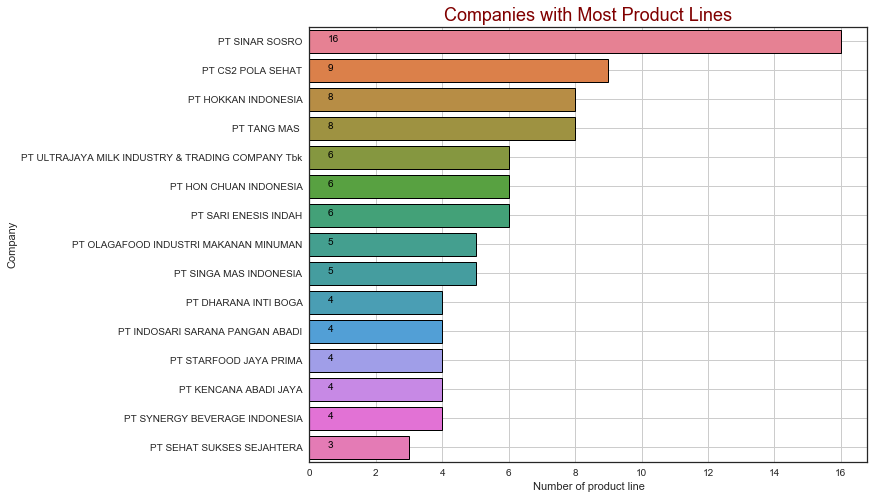

In [184]:
dataset_cline = dataset[["produsen","merk"]].drop_duplicates()
cline_count = dataset_cline["produsen"].value_counts().reset_index()
#create graph
plt.figure(figsize=(10,8))
ax = sns.barplot(y=cline_count["index"][:15],x = cline_count["produsen"][:15],palette="husl",
                 linewidth=1,edgecolor="k"*15)
plt.xlabel("Number of product line")
plt.ylabel("Company")
plt.grid(True)
plt.title("Companies with Most Product Lines",color='maroon',fontsize = 18)

for i,j in enumerate(cline_count["produsen"][:15].astype(str)):
    ax.text(0.55,i,j,fontsize = 10,color="black")
plt.show()

PT Sinar Sosro has the most product lines compared to other tea drink manufacturers. It is not surprising since its core competence is in tea industry, and Sosro has been in industry for almost 50 years.

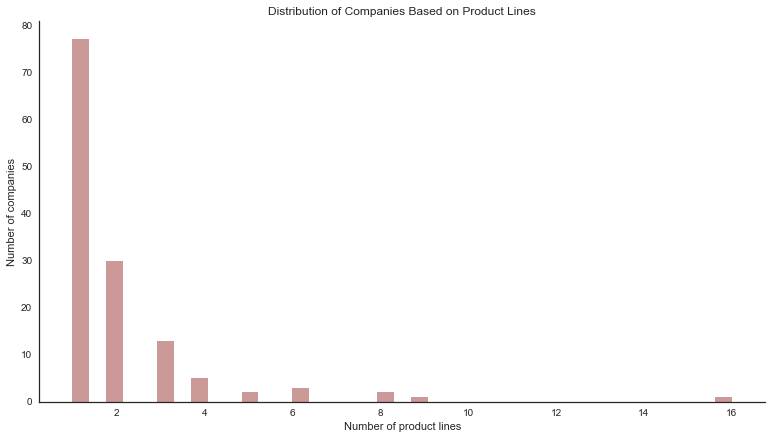

In [205]:
cline_dist = cline_count["produsen"]
plt.figure(figsize=(13,7))
ax = sns.distplot(cline_dist, kde=False, color="maroon")
sns.set_style("white")
sns.despine()
 
# Add title and axis names
plt.title('Distribution of Companies Based on Product Lines')
plt.xlabel('Number of product lines')
plt.ylabel('Number of companies')

plt.show()

Many tea drink manufacturers hold only one brand.

## Companies Producing Less Plastics

Companies are producing less plastics when the have no product line with plastic packages. Plastic cups, plastic bottles, and PET packages are considered plastic packages.

Basically, we want to make a left join operation. Here's the approach.
1. Divide "jenis_kemasan" values to two arrays: non-plastics and plastics.
2. Create dataframe with companies producing tea drink in plastic packages.
3. Create dataframe with companies producing tea drink in non-plastic packages.
4. Remove dataframe step 2 from dataframe step 3.

In [206]:
non_plastics = ["Kaleng", "Karton Laminat", "Botol Kaca", "Tetrapak", "Pouch Aluminium Foil"]
plastics = ["Gelas Plastik", "Botol Plastik", "Plastik", "Gelas Plastik PET", "Botol Plastik PET"]
dataset_plastics = dataset[dataset['jenis_kemasan'].isin(plastics)]
dataset_non_plastics = dataset[dataset['jenis_kemasan'].isin(non_plastics)]
corp_plastics = dataset_plastics["produsen"].drop_duplicates().values
corp_clean = dataset_non_plastics[~dataset_non_plastics.isin(corp_plastics)]
corp_clean = corp_clean["produsen"].drop_duplicates().reset_index()

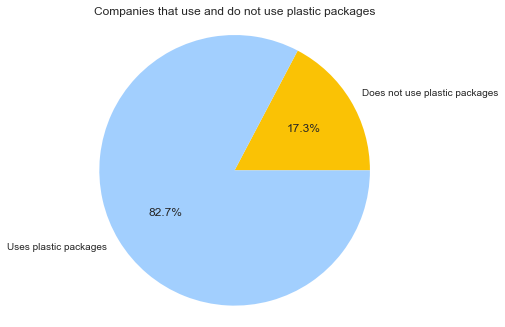

In [207]:
# Plastic manufacturer pie chart
labels = ['Does not use plastic packages', 'Uses plastic packages']
sizes = [corp_clean["produsen"].count(),dataset["produsen"].drop_duplicates().count()]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors =['xkcd:goldenrod', 'xkcd:baby blue'])
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Companies that use and do not use plastic packages')

plt.show()

We found 28 companies that doesn't use any plastic package in their product lines. It equals to 17.3% of all tea drink manufacturers.

From this finding, we know that there is no sign of plastic pollution awareness among the companies. Plastic packages are used because they are cheap, durable, and easy to manufacture. Negative environmental effects are not considered. There is no enforcement or regulation in Indonesia, yet.

Maybe additional regulation could help. Government can give incetives to company that uses no plastic package in their product line. Another idea, companies producing certain amount of plastics can be subject to penalty.

## Flavours in Different Servings

## Flavours in Different Packages

## Flavours in Different Regions

## Servings in Different Regions